In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd


In [4]:
#loading a sample dataset
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
X,y=digits.data,digits.target

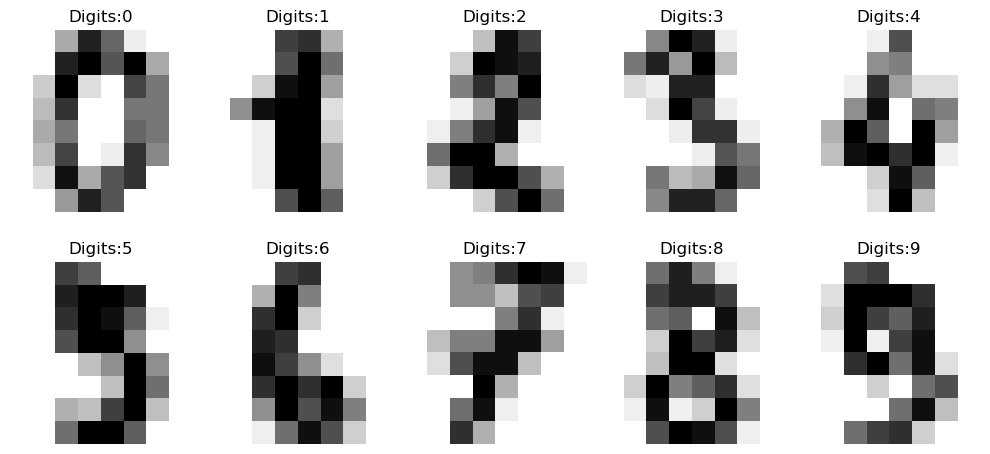

In [12]:
#plot 10 sample digits
fig,axes=plt.subplots(2,5,figsize=(10,5))
axes=axes.ravel() #flatten the the 2*5 array to 1D

for i in range(10):
    axes[i].imshow(digits.images[i],cmap=plt.cm.gray_r)
    axes[i].set_title(f'Digits:{y[i]}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Model with Decision Tree

In [32]:
dt=DecisionTreeClassifier()


In [33]:
dt_model=dt.fit(X_train,y_train)

In [34]:
dt_predictions=dt_model.predict(X_test)

In [35]:
dt_accuracy=accuracy_score(y_test,dt_predictions)
dt_accuracy

0.8527777777777777

### Model with Random Forest

In [36]:
rf_model=RandomForestClassifier()

In [37]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
rf_predictions=rf_model.predict(X_test)
rf_accuracy=accuracy_score(y_test,rf_predictions)
rf_accuracy

0.9777777777777777

In [39]:
rf_conf_matrix=confusion_matrix(y_test,rf_predictions)

In [40]:
rf_conf_matrix

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 38]], dtype=int64)

In [41]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

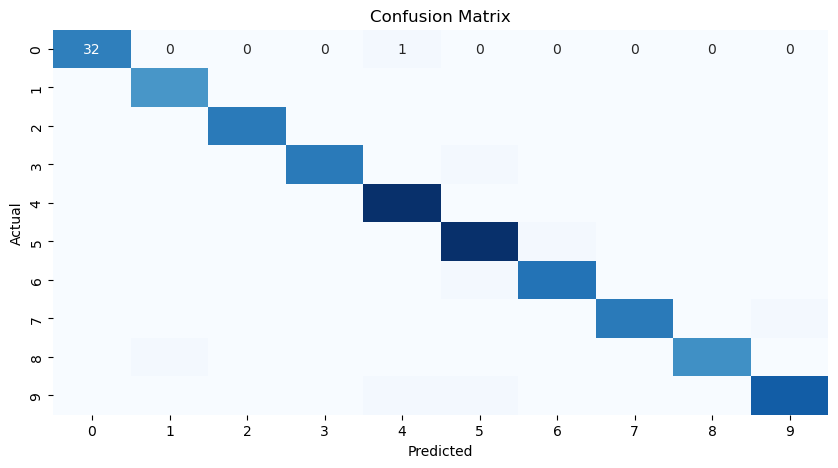

In [46]:
plt.figure(figsize=(10,5))
heatmap=sns.heatmap(rf_conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,annot_kws={"size":10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Gradient Boosting

In [47]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
gb_predictions=gb_model.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_predictions)

In [48]:
gb_accuracy

0.9694444444444444

In [49]:
gb_conf_matrix=confusion_matrix(y_test,gb_predictions)

In [50]:
gb_conf_matrix

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  0, 32,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 44,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 33,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 38]], dtype=int64)

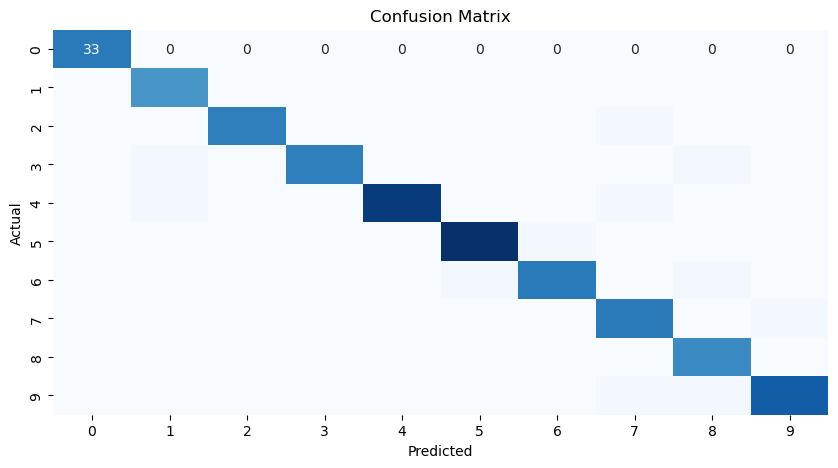

In [51]:
plt.figure(figsize=(10,5))
heatmap=sns.heatmap(gb_conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,annot_kws={"size":10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()